In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
experiments = {4: 10, 
               8: 10, 
               16: 10, 
               32: 15, 
               64: 10, 
               128: 10, 
               256: 10, 
               512: 10, 
               1024: 5}

N = 3000
episodes = np.arange(N);

In [ ]:
results = pd.DataFrame(index = episodes)

for batch_size in batch_sizes:

  avg_time = np.zeros(N)
  avg_rewards = np.zeros(N)

  for experiment in range(experiments[batch_size]):
      # time 
      time = pd.read_csv('/drive/My Drive/RL Project Yara/HW-Results/BatchSize'+str(batch_size)+'/total_time_'+str(batch_size)+'_'+str(experiment)+'.csv',
                         index_col="Unnamed: 0")

      results['time_'+str(batch_size)+'_'+str(experiment)] = time
      avg_time = np.add(avg_time, results['time_'+str(batch_size)+'_'+str(experiment)])

      # rewards
      rew = pd.read_csv('/drive/My Drive/RL Project Yara/HW-Results/BatchSize'+str(batch_size)+'/rewards_'+str(batch_size)+'_'+str(experiment)+'.csv',
                        index_col="Unnamed: 0")
      results['rewards_'+str(batch_size)+'_'+str(experiment)] = rew
      avg_rewards = np.add(avg_rewards, results['rewards_'+str(batch_size)+'_'+str(experiment)])
      

  results['avg_time_'+str(batch_size)] = (1/experiments[batch_size])*avg_time
  results['avg_rewards_'+str(batch_size)] = (1/experiments[batch_size])*avg_rewards

#results.to_csv('/drive/My Drive/RL Project Yara/results.csv')  

results.head()


,time_4_0,rewards_4_0,time_4_1,rewards_4_1,time_4_2,rewards_4_2,time_4_3,rewards_4_3,time_4_4,rewards_4_4,time_4_5,rewards_4_5,time_4_6,rewards_4_6,time_4_7,rewards_4_7,time_4_8,rewards_4_8,time_4_9,rewards_4_9,avg_time_4,avg_rewards_4,time_8_0,rewards_8_0,time_8_1,rewards_8_1,time_8_2,rewards_8_2,time_8_3,rewards_8_3,time_8_4,rewards_8_4,time_8_5,rewards_8_5,time_8_6,rewards_8_6,time_8_7,rewards_8_7,time_8_8,rewards_8_8,...,time_256_8,rewards_256_8,time_256_9,rewards_256_9,avg_time_256,avg_rewards_256,time_512_0,rewards_512_0,time_512_1,rewards_512_1,time_512_2,rewards_512_2,time_512_3,rewards_512_3,time_512_4,rewards_512_4,time_512_5,rewards_512_5,time_512_6,rewards_512_6,time_512_7,rewards_512_7,time_512_8,rewards_512_8,time_512_9,rewards_512_9,avg_time_512,avg_rewards_512,time_1024_0,rewards_1024_0,time_1024_1,rewards_1024_1,time_1024_2,rewards_1024_2,time_1024_3,rewards_1024_3,time_1024_4,rewards_1024_4,avg_time_1024,avg_rewards_1024
0,2.869017,12.0,0.040460,30.0,0.000384,11.0,0.000586,17.0,0.043523,60.0,0.039236,15.0,0.000422,12.0,0.042263,22.0,0.036552,19.0,0.037339,19.0,0.310978,21.7,2.358793,30.0,0.000645,15.0,0.000496,11.0,0.051198,17.0,0.047080,18.0,0.048550,13.0,0.048096,15.0,0.048104,38.0,0.050530,19.0,...,0.000873,33.0,0.038268,19.0,0.024258,24.9,0.000612,11.0,0.046139,31.0,0.044059,12.0,0.000857,8.0,0.000705,17.0,0.000683,15.0,0.001087,28.0,0.046961,42.0,0.339507,24.0,0.060376,13.0,0.054098,20.1,0.059973,21.0,0.053036,34.0,0.229325,10.0,0.041276,14.0,0.004675,14.0,0.077657,18.6
1,0.003109,13.0,0.000429,12.0,0.044897,29.0,0.047472,17.0,0.091948,40.0,0.000541,18.0,0.002576,14.0,0.003478,9.0,0.012342,20.0,0.000515,16.0,0.020731,18.8,0.010821,46.0,0.056389,16.0,0.057589,18.0,0.007984,15.0,0.009159,30.0,0.008658,27.0,0.004701,11.0,0.005594,38.0,0.001447,39.0,...,0.043759,28.0,0.005884,19.0,0.016064,26.0,0.282686,12.0,0.001579,17.0,0.006798,13.0,0.001903,18.0,0.078945,69.0,0.058990,12.0,0.049126,26.0,0.003034,11.0,0.001540,35.0,0.000593,15.0,0.048519,22.8,0.005451,17.0,0.004758,10.0,0.000572,13.0,0.003487,12.0,0.000718,15.0,0.002997,13.4
2,0.001975,16.0,0.001544,23.0,0.004888,59.0,0.000651,22.0,0.117943,19.0,0.003010,31.0,0.000512,20.0,0.002650,22.0,0.001828,27.0,0.186818,81.0,0.032182,32.0,0.000426,9.0,0.001681,10.0,0.001871,15.0,0.000750,22.0,0.005085,29.0,0.000555,17.0,0.001737,14.0,0.133514,25.0,0.003043,8.0,...,0.000569,22.0,0.001260,10.0,0.312117,20.3,0.002545,30.0,0.000431,12.0,0.000492,14.0,0.000770,15.0,0.218829,20.0,0.004559,24.0,0.002096,13.0,0.003617,36.0,0.003103,34.0,0.001864,14.0,0.023831,21.2,0.003247,29.0,0.002929,32.0,0.002081,25.0,0.000543,17.0,0.280988,15.0,0.057957,23.6
3,0.000491,15.0,0.002647,15.0,0.171429,12.0,0.000393,9.0,0.152063,25.0,0.000349,11.0,0.040035,31.0,0.001530,11.0,0.000412,12.0,0.121030,20.0,0.049038,16.1,0.001830,10.0,0.000423,11.0,0.001830,10.0,0.001683,9.0,0.408160,57.0,0.000594,13.0,0.000459,11.0,0.405451,47.0,0.000532,14.0,...,0.000456,16.0,0.000390,14.0,0.059220,22.1,0.003625,16.0,0.001300,11.0,0.002335,15.0,0.299055,27.0,0.183326,11.0,0.002115,22.0,0.385030,48.0,0.225013,18.0,0.371161,11.0,0.003579,11.0,0.147654,19.0,0.005319,32.0,0.001361,11.0,0.000706,22.0,0.001456,17.0,0.000477,10.0,0.001864,18.4
4,0.001603,17.0,0.001474,11.0,0.111577,16.0,0.000583,22.0,0.070253,12.0,0.153250,32.0,0.000643,14.0,0.002490,11.0,0.001525,17.0,0.116497,20.0,0.045989,17.2,0.429080,31.0,0.145151,51.0,0.001719,9.0,0.001848,15.0,0.092989,12.0,0.002043,14.0,0.000571,15.0,0.205471,24.0,0.000575,16.0,...,0.347198,36.0,0.002568,16.0,0.128778,23.0,0.002109,15.0,0.216322,36.0,0.000359,9.0,0.004634,31.0,0.193351,11.0,0.001894,18.0,0.266162,17.0,0.437208,27.0,0.355947,20.0,0.003035,28.0,0.148102,21.2,0.638570,19.0,0.268259,18.0,0.002305,18.0,0.002092,14.0,0.002367,38.0,0.182719,21.4


### Plots

In [4]:
results = pd.read_csv('/drive/My Drive/RL Project/results.csv')

In [5]:
# set sns theme and colorscheme 
palette = sns.mpl_palette('Spectral',9)
sns.set_theme(palette=palette, context='notebook', font_scale=1.3)

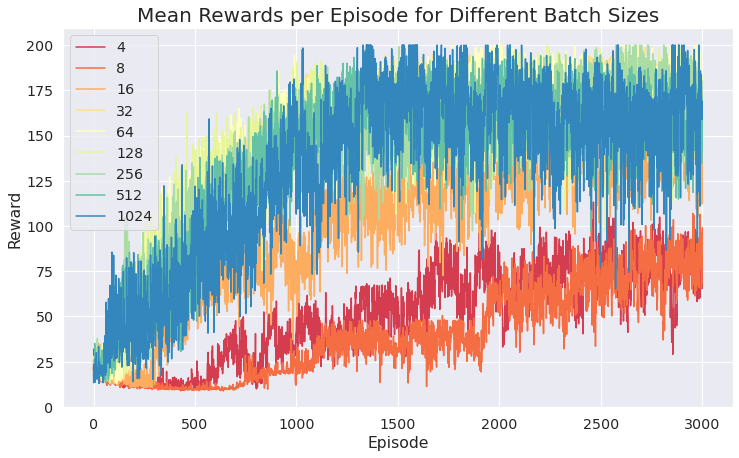

In [6]:
# rewards as fn of episodes for every batch size on the same plot 
fig = plt.figure(figsize=(12,7))

for batch_size in batch_sizes:
  plt.plot(episodes, results['avg_rewards_'+str(batch_size)], label=str(batch_size))

plt.xlabel('Episode')
plt.ylabel('Reward')

plt.legend()
plt.title("Mean Rewards per Episode for Different Batch Sizes",fontsize=20);

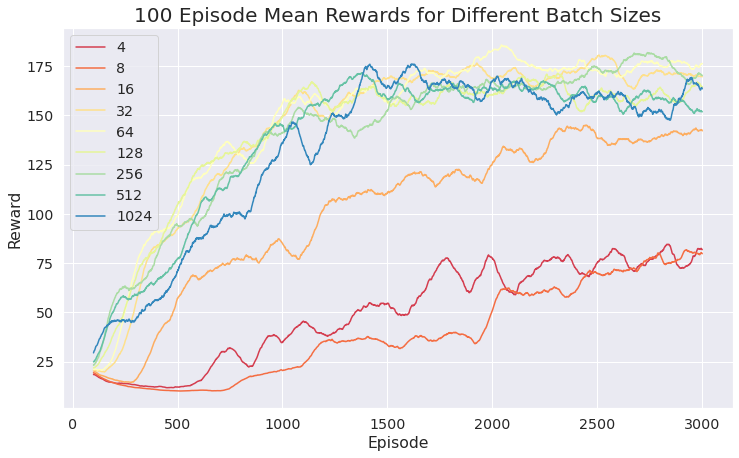

In [7]:
# 100 episode avg rewards
fig = plt.figure(figsize=(12,7))

for batch_size in batch_sizes:
  avg = results['avg_rewards_'+str(batch_size)]
  avg100 = np.zeros(N)
  for episode in episodes:
    #avg100[episode] = np.mean(avg[episode:(episode+100)])
    avg100[episode] = np.mean(avg[(episode-100):episode])

  plt.plot(episodes, avg100, label=str(batch_size))

plt.xlabel('Episode')
plt.ylabel('Reward')

plt.legend()
plt.title("100 Episode Mean Rewards for Different Batch Sizes",fontsize=20);

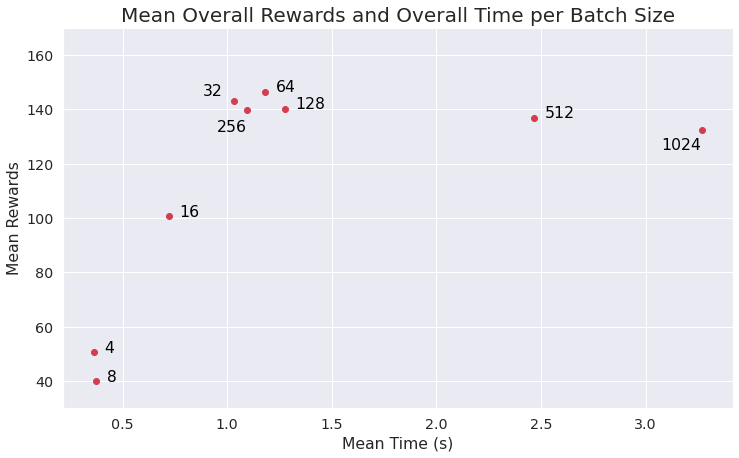

In [8]:
# scatter plot of overall avg avg time and avg avg rewards
avg_rews_time = pd.DataFrame()
for batch_size in batch_sizes:
    avg_rews_time[batch_size] = np.array([np.mean(results['avg_time_'+str(batch_size)]), np.mean(results['avg_rewards_'+str(batch_size)])])

avg_rews_time = avg_rews_time.T
avg_rews_time.columns = ['avg_total_time','avg_total_rews']

x = avg_rews_time['avg_total_time']
y = avg_rews_time['avg_total_rews']

fig = plt.figure(figsize=(12,7))
plt.scatter(x,y) #data=avg_rews_time,) #x='avg_total_time', y='avg_total_rews')
plt.ylim([30,170])
plt.xlabel('Mean Time (s)')
plt.ylabel('Mean Rewards')

for i in range(9):
    if batch_sizes[i] == 32:
      plt.text(avg_rews_time.iloc[i,0]-0.05, avg_rews_time.iloc[i,1]+2, str(batch_sizes[i]), horizontalalignment='right', size='medium', color='black')
    elif batch_sizes[i] == 256:
      plt.text(avg_rews_time.iloc[i,0], avg_rews_time.iloc[i,1]-8, str(batch_sizes[i]), horizontalalignment='right', size='medium', color='black')
    elif batch_sizes[i] == 1024:
      plt.text(avg_rews_time.iloc[i,0]-0.005, avg_rews_time.iloc[i,1]-7, str(batch_sizes[i]), horizontalalignment='right', size='medium', color='black')
    else:
      plt.text(avg_rews_time.iloc[i,0]+0.05, avg_rews_time.iloc[i,1], str(batch_sizes[i]), size='medium', color='black')

plt.title("Mean Overall Rewards and Overall Time per Batch Size",fontsize=20)
plt.show()


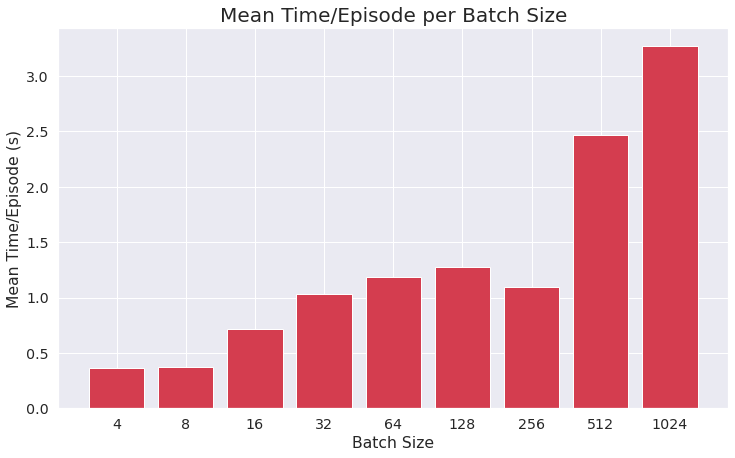

In [9]:
# mean time/episode per batch size
fig = plt.figure(figsize=(12,7))
plt.bar([str(bs) for bs in batch_sizes],avg_rews_time['avg_total_time'])
plt.xlabel('Batch Size')
plt.ylabel('Mean Time/Episode (s)')
plt.title("Mean Time/Episode per Batch Size",fontsize=20);

In [10]:
#getting the running avg of all experiments 
results100 = pd.DataFrame(index = episodes)

for batch_size in batch_sizes:
  for experiment in range(experiments[batch_size]):
    ress = results['rewards_'+str(batch_size)+'_'+str(experiment)]
    avg100each = np.zeros(N)
    for episode in episodes: 
      avg100each[episode] = np.mean(ress[(episode-100):episode])
    results100['rewards_'+str(batch_size)+'_'+str(experiment)] = avg100each

In [ ]:
#results100.to_csv('/drive/My Drive/RL Project Yara/results100.csv') 

In [11]:
# getting the number of trials succesfully completed 
successes = np.where(sum(np.where(results100>=195, 1,0)) > 0, 1, 0)
print(f"Successfully completed {sum(successes)} experiments out of 90.\nThose are:")
print(results100.columns[np.where(successes>0,True,False)])

Successfully completed 28 experiments out of 90.
Those are:
Index(['rewards_8_4', 'rewards_32_0', 'rewards_32_1', 'rewards_32_2',
       'rewards_32_4', 'rewards_32_5', 'rewards_32_6', 'rewards_32_7',
       'rewards_32_9', 'rewards_32_10', 'rewards_32_11', 'rewards_32_12',
       'rewards_32_14', 'rewards_64_0', 'rewards_64_1', 'rewards_64_6',
       'rewards_64_7', 'rewards_64_8', 'rewards_64_9', 'rewards_128_0',
       'rewards_128_5', 'rewards_256_0', 'rewards_256_1', 'rewards_256_3',
       'rewards_256_6', 'rewards_512_4', 'rewards_512_8', 'rewards_1024_0'],
      dtype='object')


In [12]:
complrates = {"4": 0,
              "8": 1/10,
              "16": 0,
              "32": 12/15,
              "64": 6/10,
              "128": 2/10,
              "256": 4/10,
              "512": 2/10,
              "1024": 1/5}         

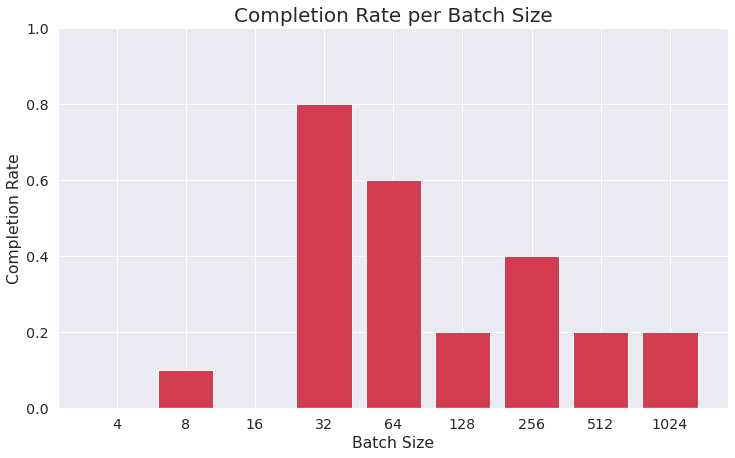

In [13]:
# completion rate during training per batch size 
fig = plt.figure(figsize=(12,7))
plt.bar([str(bs) for bs in batch_sizes], [complrates[str(bs)] for bs in batch_sizes])
plt.ylim([0,1])

plt.xlabel('Batch Size')
plt.ylabel('Completion Rate')
plt.title("Completion Rate per Batch Size",fontsize=20)
plt.show()